In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
df=pd.read_csv("train (3).csv")


In [5]:
df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [6]:
df.tail()

,id,gravity,ph,osmo,cond,urea,calc,target
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1
413,413,1.011,6.13,364,9.9,159,0.27,0


In [7]:
df.sample()

,id,gravity,ph,osmo,cond,urea,calc,target
175,175,1.007,6.63,253,8.4,133,1.03,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [9]:
df.shape

(414, 8)

In [10]:
df.dtypes

id           int64
gravity    float64
ph         float64
osmo         int64
cond       float64
urea         int64
calc       float64
target       int64
dtype: object

In [11]:
df.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [12]:
df.describe(include="all")

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [13]:
df.isnull()

,id,gravity,ph,osmo,cond,urea,calc,target
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False,False


In [14]:
df.drop(["id","gravity","osmo","calc"],axis=1,inplace=True)

In [15]:
df.columns

Index(['ph', 'cond', 'urea', 'target'], dtype='object')

In [16]:
df.head()

,ph,cond,urea,target
0,6.19,14.8,124,0
1,5.40,23.6,394,0
2,6.13,24.5,159,0
3,4.91,20.8,398,1
4,5.53,17.8,385,1


<AxesSubplot:>

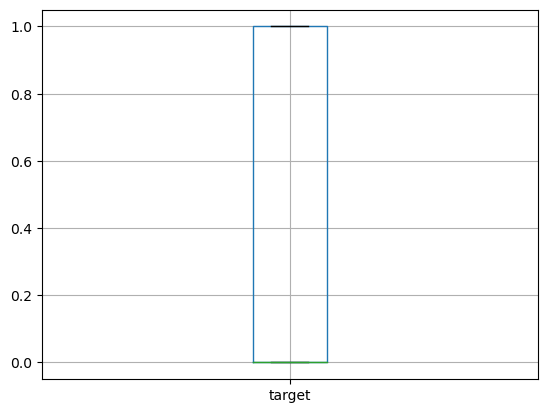

In [17]:
df.boxplot(column=["target"])

<AxesSubplot:xlabel='target', ylabel='count'>

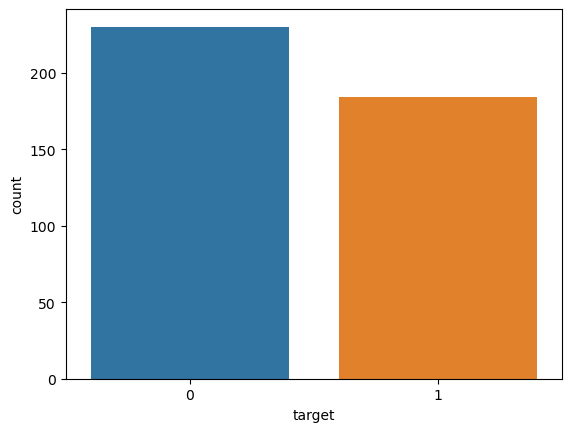

In [18]:
sns.countplot(x="target",data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

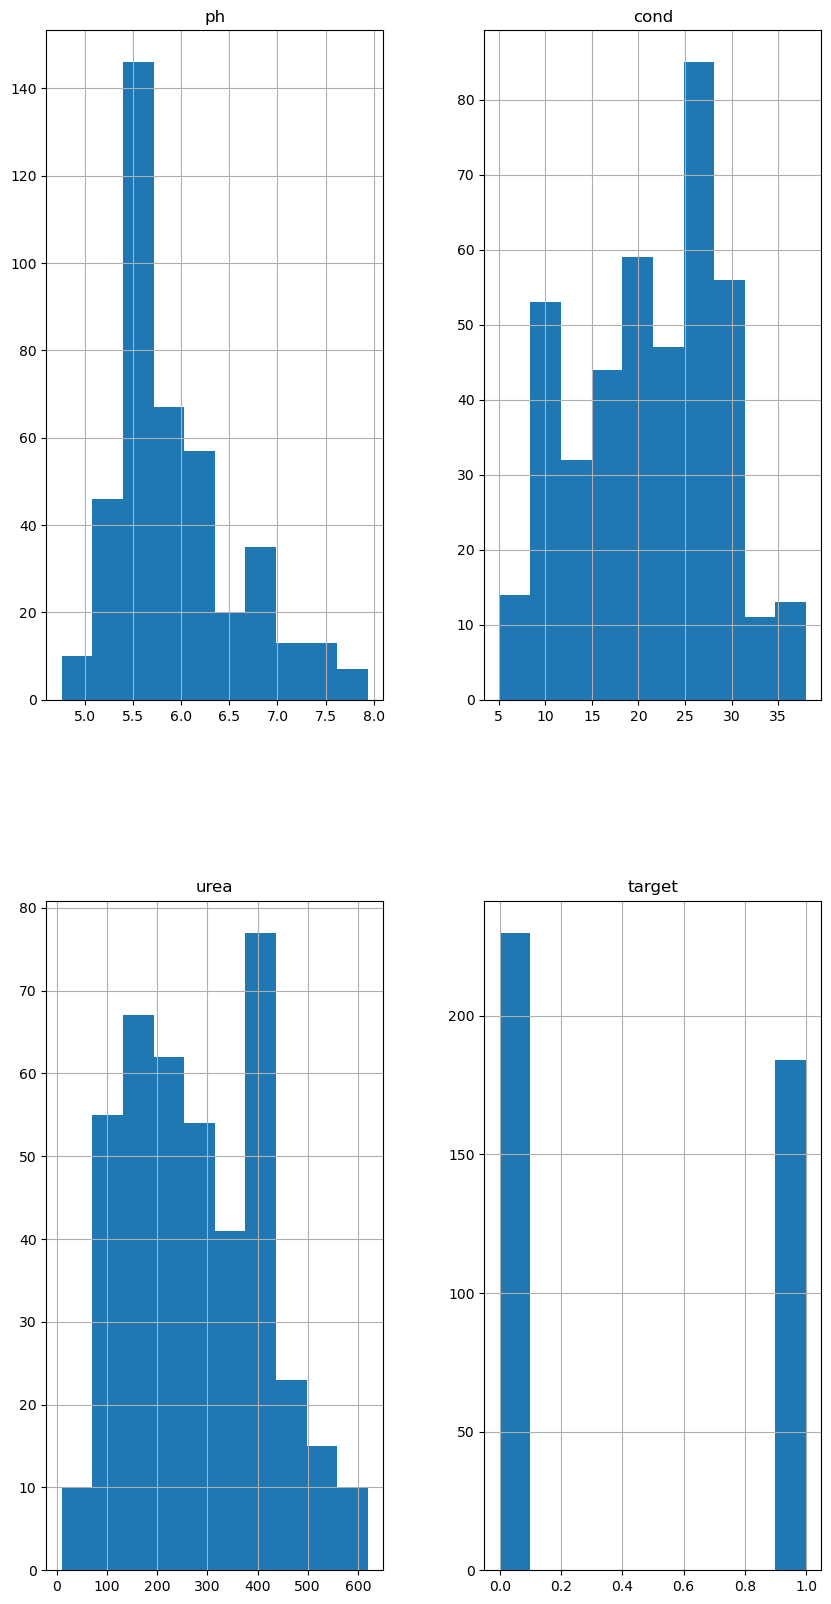

In [19]:
df.hist(figsize=(10,20))
plt.show

In [20]:
from sklearn.preprocessing import StandardScaler
sts=StandardScaler()

In [21]:
feature=['urea','cond','ph']
df[feature]=sts.fit_transform(df[feature])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [23]:
X=df.drop("target",axis=1)
y=df["target"]

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [25]:
model=LogisticRegression()

In [26]:
model.fit(X_train,y_train)

LogisticRegression()

In [27]:
model.score(X_train,y_train)

0.5986159169550173

In [28]:
model.score(X_test,y_test)

0.696

In [29]:
predictions=model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[58, 22],
       [16, 29]], dtype=int64)

<AxesSubplot:>

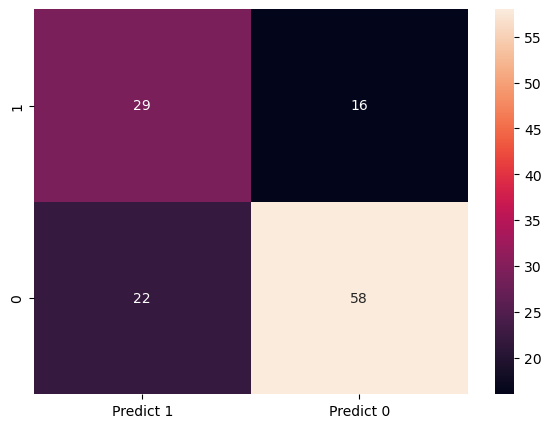

In [30]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model1=DecisionTreeClassifier(max_depth=2)

In [33]:
model1.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=2)

In [34]:
print(model1.score(X_train,y_train))
print(model1.score(X_test,y_test))

0.6470588235294118
0.592


In [35]:
model2=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model2.fit(X_train,y_train)
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))

0.6747404844290658
0.648


In [36]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore 

In [37]:
model_knn=KNeighborsClassifier()
model_knn.fit(X_train,y_train)


KNeighborsClassifier()

In [38]:
predicted_labels=model_knn.predict(X_test)
print(model_knn.score(X_test,y_test))
print(model_knn.score(X_train,y_train))

0.608
0.7197231833910035


In [39]:
from sklearn.naive_bayes import GaussianNB
model_naive=GaussianNB()

In [40]:
model_naive.fit(X_train,y_train)

GaussianNB()

In [41]:
print(model_naive.score(X_train,y_train))
print(model_naive.score(X_test,y_test))

0.6228373702422145
0.696


In [42]:
from sklearn.ensemble import BaggingClassifier

In [43]:
model_bag=BaggingClassifier(n_estimators=75,base_estimator=model2)

In [44]:
model_bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=3),
                  n_estimators=75)

In [45]:
print(model_bag.score(X_train,y_train))
print(model_bag.score(X_test,y_test))

0.6955017301038062
0.68


In [46]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
model_ada=AdaBoostClassifier(n_estimators=1)

In [48]:
model_ada.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [49]:
print(model_ada.score(X_train,y_train))
print(model_ada.score(X_test,y_test))

0.6020761245674741
0.544


In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
model_boost=GradientBoostingClassifier(n_estimators=3)

In [52]:
model_boost.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=3)

In [53]:
print(model_boost.score(X_train,y_train))
print(model_boost.score(X_test,y_test))

0.698961937716263
0.664


In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
model_forest=RandomForestClassifier(max_depth=3)

In [56]:
model_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=3)

In [57]:
print(model_forest.score(X_train,y_train))
print(model_forest.score(X_test,y_test))

0.698961937716263
0.672


In [58]:
from sklearn.svm import SVC

In [59]:
model_svc=SVC()

In [60]:
model_svc.fit(X_train,y_train)

SVC()

In [61]:
print(model_svc.score(X_train,y_train))
print(model_svc.score(X_test,y_test))

0.671280276816609
0.688


In [62]:
df1=pd.read_csv("test (3).csv")

In [63]:
df1.head()

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36


In [64]:
df2=df1.drop(["id","gravity","osmo","calc"],axis=1)

In [65]:
df2[feature]=sts.fit_transform(df2[feature])

In [66]:
df2.shape

(276, 3)

In [67]:
df.head()

,ph,cond,urea,target
0,0.365623,-0.884388,-1.134869,0
1,-0.865897,0.288059,0.846384,0
2,0.272090,0.407969,-0.878040,0
3,-1.629751,-0.084992,0.875736,1
4,-0.663242,-0.484690,0.780342,1


In [68]:
y_predicted=model_knn.predict(df2)

In [69]:
sample_submission=pd.DataFrame({
    "id":df1["id"],
    "target": y_predicted
})

In [70]:
sample_submission.to_csv("kidney_stone3.csv",index=False)